# Time Series Forecasting Using FBProfhet

I have already made a notebook regarding Time Series Forecasting ,using GRU and SARIMAX.But for most of the time, fbprofit outperforms them and is actually very easy to use.So i decided to make a sepearte notebook for this.

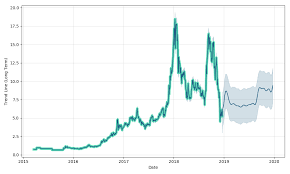

# Loading Data

In [58]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [59]:
df=pd.read_csv("../input/stock-price-predictions/Banana.csv",parse_dates=['Price Date'])
df.head()

,Price Date,States,Commodity,Modal Price (Rs./Quintal)
0,2020-07-14,Delhi,Banana,1550
1,2020-07-13,Delhi,Banana,1500
2,2020-07-11,Delhi,Banana,1500
3,2020-07-10,Delhi,Banana,1500
4,2020-07-09,Delhi,Banana,1400


In [60]:
df.drop(['States','Commodity'],axis=1,inplace=True)

In [61]:
df.head()

,Price Date,Modal Price (Rs./Quintal)
0,2020-07-14,1550
1,2020-07-13,1500
2,2020-07-11,1500
3,2020-07-10,1500
4,2020-07-09,1400


# Splitting of data according to year

In [62]:
test= df[df["Price Date"]>"2019"]
print(len(df1))

376


In [63]:
train= df[df["Price Date"]<"2019"]
len(df2)

1484

# It's a convention for using FBProfhet 

Whenever we have to train on a dataset, we have to use the provided column names.

In [64]:
train.columns=["ds","y"]
test.columns=["date","y"]

In [65]:
model=Prophet()
model.fit(train)
future=model.make_future_dataframe(periods=366,freq='D')

In [66]:
future.tail()

,ds
1845,2019-12-28
1846,2019-12-29
1847,2019-12-30
1848,2019-12-31
1849,2020-01-01


In [67]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1845,2019-12-28,913.897843,341.930519,981.366440,781.969045,1028.193858,-234.430850,-234.430850,-234.430850,17.319223,17.319223,17.319223,-251.750073,-251.750073,-251.750073,0.0,0.0,0.0,679.466993
1846,2019-12-29,913.394298,239.452750,882.848881,780.655472,1028.494899,-363.272844,-363.272844,-363.272844,-119.793164,-119.793164,-119.793164,-243.479681,-243.479681,-243.479681,0.0,0.0,0.0,550.121453
1847,2019-12-30,912.890753,380.402027,1031.625483,779.588586,1028.696819,-217.681968,-217.681968,-217.681968,16.698180,16.698180,16.698180,-234.380148,-234.380148,-234.380148,0.0,0.0,0.0,695.208785
1848,2019-12-31,912.387207,363.298791,1018.905704,778.819394,1028.462432,-210.596618,-210.596618,-210.596618,14.004858,14.004858,14.004858,-224.601476,-224.601476,-224.601476,0.0,0.0,0.0,701.790590
1849,2020-01-01,911.883662,377.658258,1029.468566,778.091922,1028.228046,-199.694528,-199.694528,-199.694528,14.603317,14.603317,14.603317,-214.297846,-214.297846,-214.297846,0.0,0.0,0.0,712.189134


# Plotting

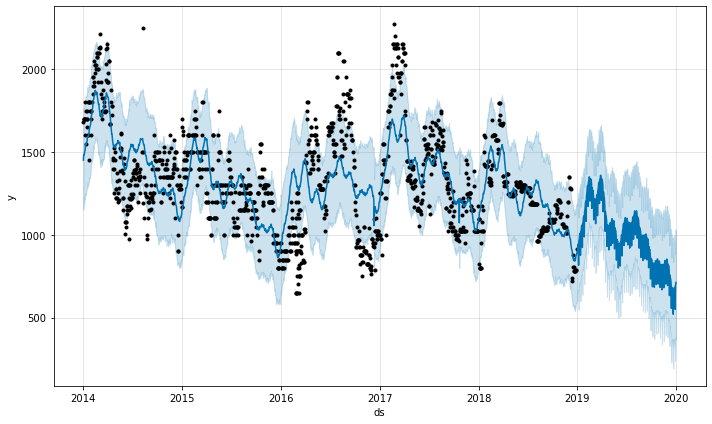

In [68]:
fig1 = model.plot(forecast)

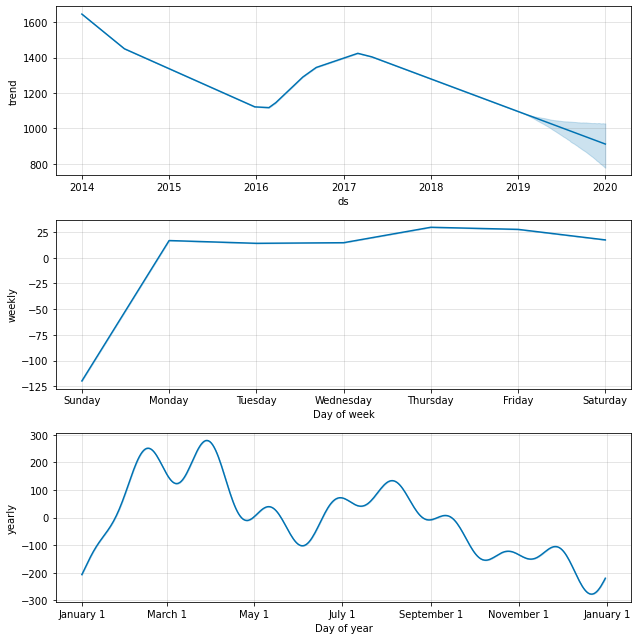

In [69]:
fig2 = model.plot_components(forecast)